Davi Dom Bosco

Bruno Sanches

Guilherme Roccato

### Descrição Projeto 3

Tema: Tinder

Pergunta a ser respondida: Um usuário dará like ou não em uma pretendente com base em suas demonstradas preferências


##### Metodologia

Primeiramente, tínhamos em mãos um dataset composto por imagens provenientes de perfis de mulheres no aplicativo Tinder (obtidas em https://www.kaggle.com/chrisroths/peoples-republic-of-tinder-1#ladies1.zip).

## I.

A fim de agruparmos imagens semelhantes para futura análise, tivemos antes, que identificar o rosto presente em cada foto, dando um zoom em sua respectiva área, e salvando esses novos recortes em uma pasta. O método utilizado para este fim foi o OpenCv, o qual possui funções capazes de identificar olhos em imagens, e também de, a partir dos olhos enquadrar a face correspondente.
Tal processo pode ser observado no exemplo a seguir

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

In [4]:
img_folder_path = 'exemplo/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

print(imgPaths)

['exemplo/image11.jpg']


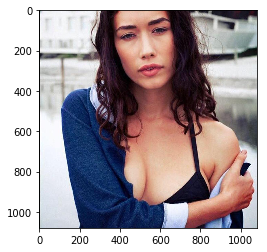

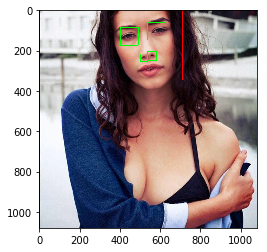

In [5]:
faces = []

for img in imgPaths:
    img = cv2.imread(img)
    
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detected_faces = face_cascade.detectMultiScale(gray)
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) > 1:
            faces.append(np.array(roi_color))
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

            plt.imshow(img)
            plt.show()


## Convertendo para escala de cinza

## II.

Tendo em mãos os recortes, o próximo passo necessário é a sua conversão para escala de cinza e tamanho pré-determinado, pois dessa forma, quando realizarmos comparações entre os diferentes perfis, obteremos um resultado mais consistente.

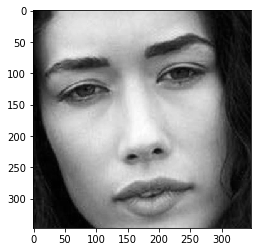

In [6]:
zoom = []
size = 100,100
numero=np.arange(0,1000,1)

for i, face in enumerate(faces):
    gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)    
    plt.imshow(gray, CMAP="gray")
    plt.show()
    img = Image.fromarray(gray)
    img.thumbnail(size)
    #img.save('rostos\{}.png'.format(numero[i]))    
    
    matriz=np.array(img)
    zoom.append(matriz)



## III.
Os próximos passos de nosso projeto, os quais ainda serão desbravados, seguirão a ordem a seguir (sejeita a alterações e iterações):

###### Limpeza das imagens - deixar na pasta original somente os recortes que o nosso programa reconheceu
###### Clustering das Imagens
Concatenaremos os arrays das imagens, para que assumam o fomato 2D e possam assim ser inseridos em um método de clustering. A princípio, pretendemos utilizar o ferramental kMeans.
###### Preenchimento das tabelas de treinamento e de teste.
###### Uso de algum método do scikit learn para preencher o teste previsto.
###### Comparação de resultados (acuracia)
###### Caso obtenhamos uma boa acuracia, partiremos para o programa em si.
Este programa em tese, funcionará da seguinte forma: aleatoriamente pegar uma(ou mais) fotos de cada cluster e apresentar para o usuario. A partir dos likes/dislikes que ele der nesses perfis apresentados, automaticamente saberemos a porcentagem de chance dele gostar ou não de determinados grupos (clusters). Dessa forma, o programa será capaz de simular a automatização do processo de escolha de encontros no Tinder. Isto é, ao invés do usuário passar horas selecionando as garotas com as quais ele se atrai, nosso programa aprenderá os gostos do usuário e automaticamente apontará interesse naqueles perfis que condizem com o que ele aprendeu.
###### Se cabível, tentaremos fazer uma interface "apresentável" para nosso programa.

## IV.
### Processos em andamento.

### Concatenando matrizes 3D -> 2D

In [69]:
matrix= []

for a in zoom:
    b= np.concatenate(a)
    matrix.append(b)
    
#Identificando fotos que não possuem 10000 pixels

#indices=[]
#i=0

#while i < len(matrix):
#    if len(matrix[i]) != 10000:
#        print(i)
#        indices.append(i)
#    i+=1
#print('-----')
#print(indices)  

#n=0
#while n<len(indices):
#    del matrix[indices[n]+n]
#    n+=1 

#print(len(matrix))
#    else:
#        print(i)
#        
#kmeans = KMeans(n_clusters=2, random_state=0).fit(matrix)
#print (kmeans.labels_)


In [7]:
#for array in matrix:
#    print (len(array))

### Clustering

In [8]:
#kmeans = KMeans(n_clusters=10, random_state=0).fit(matrix)